In [51]:
import pandas as pd
import sys
import numpy as np
import quantstats as qs
sys.path.append('..')
from functools import reduce

from backtest.performance_generater import PerformanceGenerator
from backtest.operators import *

In [2]:
open = pd.read_csv('/Volumes/Database/Factor_data/open.csv', index_col=0, parse_dates=True)
Close = pd.read_csv('/Volumes/Database/Factor_data/close.csv', index_col=0, parse_dates=True)
High = pd.read_csv('/Volumes/Database/Factor_data/high.csv', index_col=0, parse_dates=True)
Low = pd.read_csv('/Volumes/Database/Factor_data/low.csv', index_col=0, parse_dates=True)
Volume = pd.read_csv('/Volumes/Database/Factor_data/volume.csv', index_col=0, parse_dates=True)
returns = pd.read_csv('/Volumes/Database/Factor_data/return.csv', index_col=0, parse_dates=True)
exp_returns = returns.shift(-2) * 0.01

In [35]:
ZTXA_close = pd.read_csv('/Volumes/Database/Factor_data/ZXTA_close.csv', index_col=0, parse_dates=True)
ZTXA_close.index = pd.to_datetime(ZTXA_close.index)
market_returns = ZTXA_close['ZTXA'].pct_change()
Benchmark = ZTXA_close['ZTXA'].pct_change().shift(-2)

In [13]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 1000


/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/tedting/anaconda3/envs/quant311/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-05-15   2013-05-15
End Period                 2024-03-12   2024-03-12
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          136.72%      1,570.48%
CAGR﹪                     5.65%        19.66%

Sharpe                     0.59         1.68
Prob. Sharpe Ratio         97.02%       100.0%
Smart Sharpe               0.56         1.6
Sortino                    0.81         2.25
Smart Sortino              0.77         2.14
Sortino/√2                 0.57         1.59
Smart Sortino/√2           0.55         1.51
Omega                      1.35         1.35

Max Drawdown               -31.51%      -30.27%
Longest DD Days            760          306
Volatility (ann.)          16.15%       16.81%
R^2                        0.53         0.53
Information Ratio          0.1          0.1
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-17,2020-03-17,2020-05-04,109,-30.267547,-28.054271
2,2015-04-24,2015-08-20,2016-02-23,306,-27.523957,-23.819774
3,2018-06-29,2018-10-26,2019-03-18,263,-22.177848,-21.680914
4,2021-04-28,2021-05-13,2021-06-22,56,-20.704309,-15.261683
5,2022-09-12,2022-10-24,2022-12-12,92,-13.667977,-13.424546


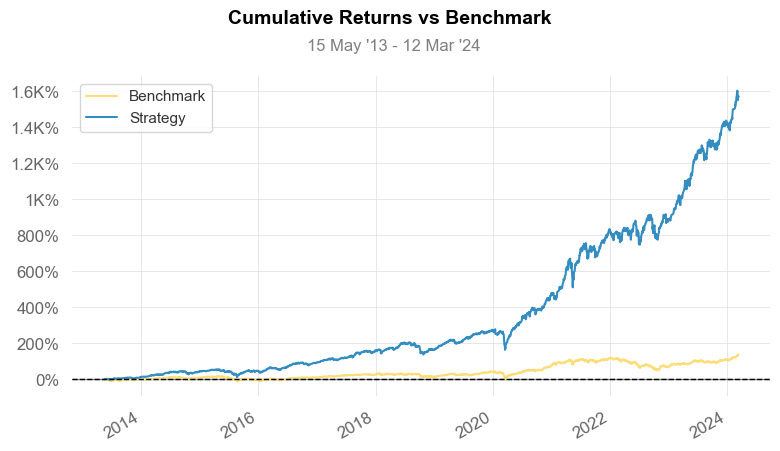

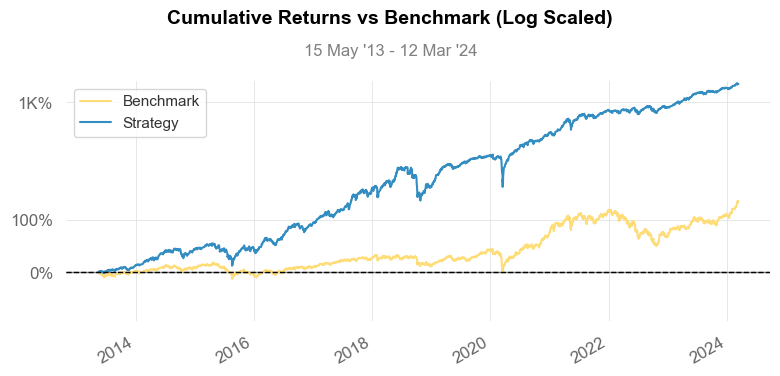

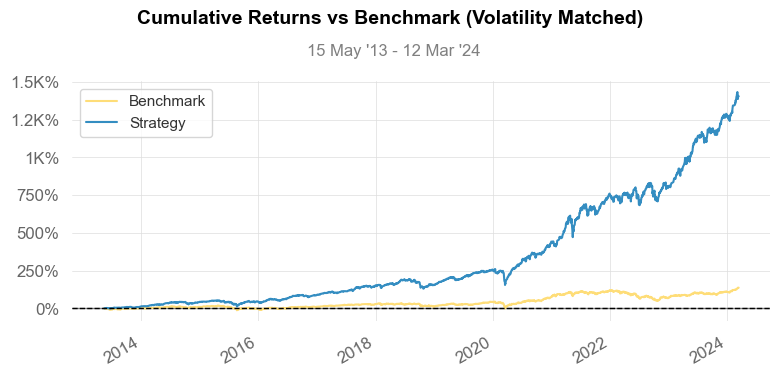

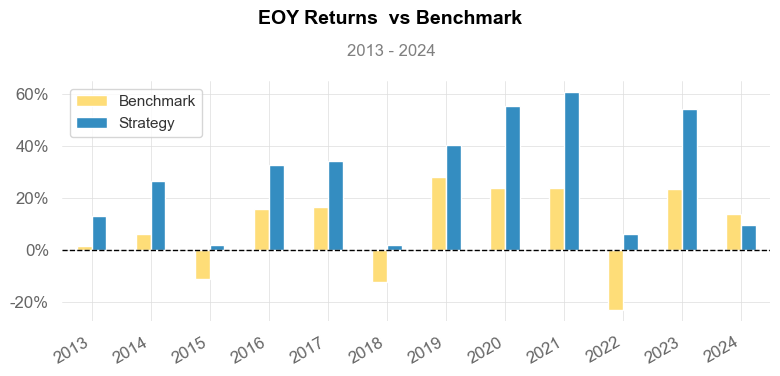

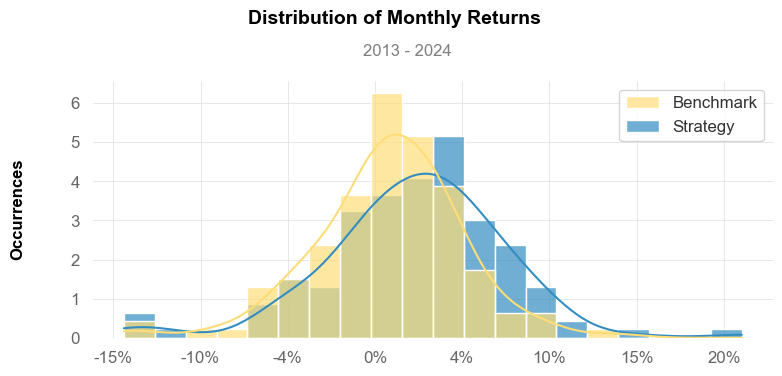

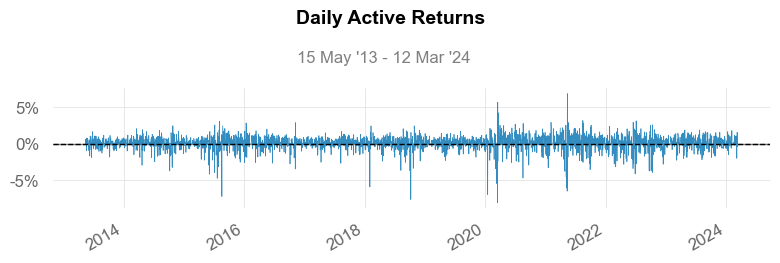

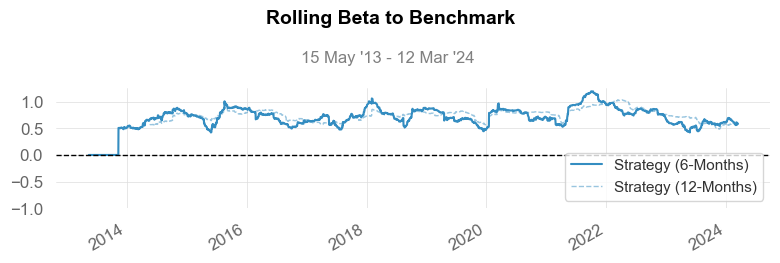

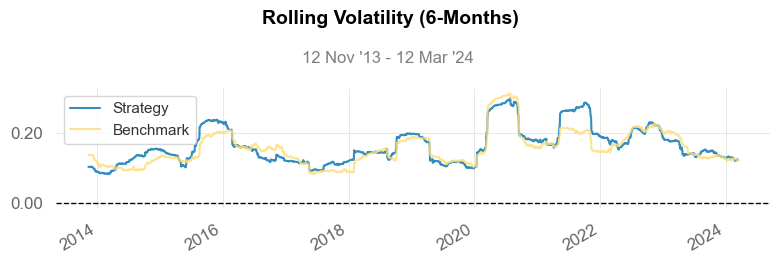

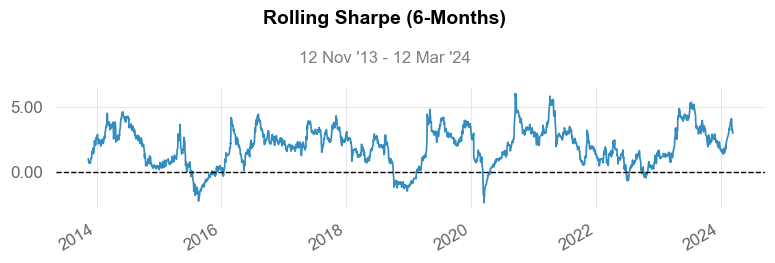

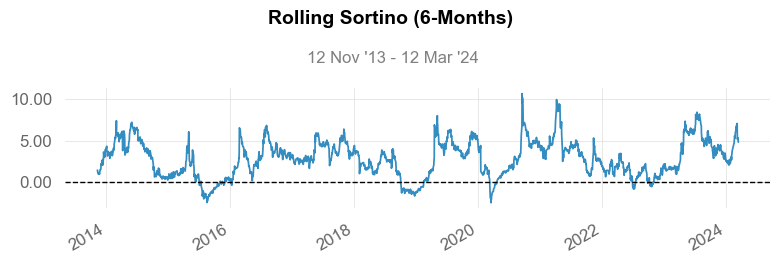

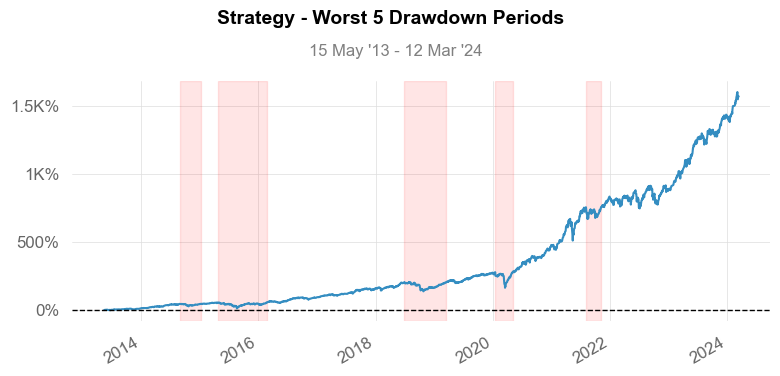

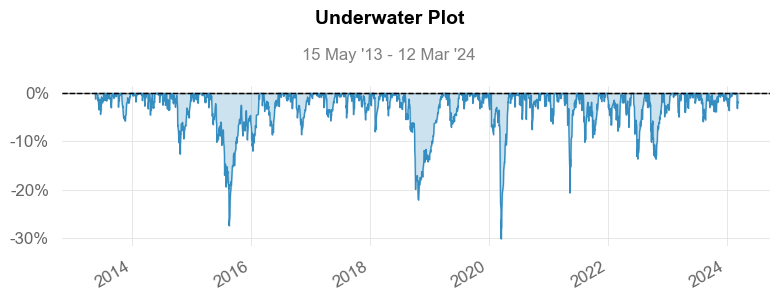

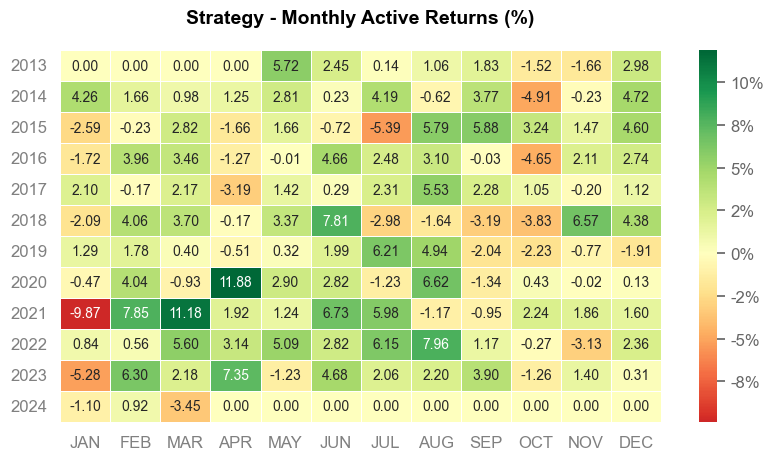

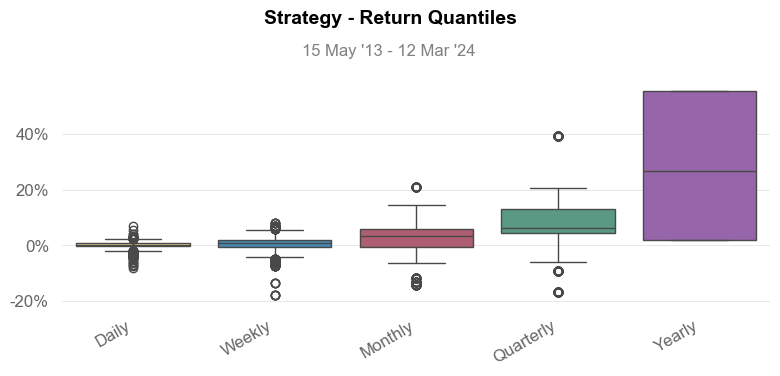

In [57]:
close = pd.read_csv('/Volumes/Database/Factor_data/close.csv', index_col=0, parse_dates=True)
operatingmargin = pd.read_csv('/Volumes/Database/Factor_data/營業利益率_90.csv', index_col=0, parse_dates=True) * 0.01
revenue_m = pd.read_csv('/Volumes/Database/Factor_data/以合併為主單月營收(千元)_90.csv', index_col=0, parse_dates=True)
outstanding = pd.read_csv('/Volumes/Database/Factor_data/流通在外股數(千股).csv', index_col=0, parse_dates=True)
FIIBV = pd.read_csv('/Volumes/Database/Factor_data/外資買進張數.csv', index_col=0, parse_dates=True)
ITBV = pd.read_csv('/Volumes/Database/Factor_data/投信買進張數.csv', index_col=0, parse_dates=True)
PTBV = pd.read_csv('/Volumes/Database/Factor_data/自營商買進張數.csv', index_col=0, parse_dates=True)
FIISV = pd.read_csv('/Volumes/Database/Factor_data/外資賣出張數.csv', index_col=0, parse_dates=True)
ITSV = pd.read_csv('/Volumes/Database/Factor_data/投信賣出張數.csv', index_col=0, parse_dates=True)
PTSV = pd.read_csv('/Volumes/Database/Factor_data/自營商賣出張數.csv', index_col=0, parse_dates=True)
ROE = pd.read_csv('/Volumes/Database/Factor_data/ROE(A)－稅後_90.csv', index_col=0, parse_dates=True)
revenue_m = pd.read_csv('/Volumes/Database/Factor_data/以合併為主單月營收(千元)_90.csv', index_col=0, parse_dates=True)
totalasset = pd.read_csv('/Volumes/Database/Factor_data/資產總額_90.csv', index_col=0, parse_dates=True)
revenue_yoy = pd.read_csv('/Volumes/Database/Factor_data/單月營收成長率％_90.csv', index_col=0, parse_dates=True)

ts_revenue_yoy = ts_rank(revenue_yoy, 252)

RevenuetoTotalasset = revenue_m/totalasset


ROE = ROE 

totalvolume = (FIIBV + ITBV + PTBV + FIISV + ITSV + PTSV)
totalvalue = totalvolume * close
ThreeII_totaltradevalue_52to252 = ts_mean(totalvalue, 52)/ts_mean(totalvalue, 12*21)

operatingincome = revenue_m * operatingmargin
cap = close * outstanding
operatingincometocap = operatingincome/cap

dfs = [ts_revenue_yoy,
       RevenuetoTotalasset,
       # ROE,
       # ThreeII_totaltradevalue_52to252,
       operatingincometocap
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)

factor = result_df[trade_volume_Filter]

stocks = 100
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003

top = factor.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.map(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight#.loc[start_time:end_time]
expreturn = exp_returns# .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
自相對營收年成長 = daily_profit - daily_fee

qs.reports.full(自相對營收年成長.loc['2013-05-14':], Benchmark, periods_per_year=252)